In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from glob import glob

In [61]:
x=sorted(glob("/content/drive/My Drive/Uber Data Analysis Project/uber-raw-data-*.csv"))
x

['/content/drive/My Drive/Uber Data Analysis Project/uber-raw-data-apr14.csv',
 '/content/drive/My Drive/Uber Data Analysis Project/uber-raw-data-aug14.csv',
 '/content/drive/My Drive/Uber Data Analysis Project/uber-raw-data-jul14.csv',
 '/content/drive/My Drive/Uber Data Analysis Project/uber-raw-data-jun14.csv',
 '/content/drive/My Drive/Uber Data Analysis Project/uber-raw-data-may14.csv',
 '/content/drive/My Drive/Uber Data Analysis Project/uber-raw-data-sep14.csv']

In [62]:
pd.concat((pd.read_csv(file).assign(filename=file)
          for file in x),ignore_index=True)

   

,Date/Time,Lat,Lon,Base,filename
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,/content/drive/My Drive/Uber Data Analysis Pro...
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,/content/drive/My Drive/Uber Data Analysis Pro...
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,/content/drive/My Drive/Uber Data Analysis Pro...
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,/content/drive/My Drive/Uber Data Analysis Pro...
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,/content/drive/My Drive/Uber Data Analysis Pro...
...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,/content/drive/My Drive/Uber Data Analysis Pro...
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,/content/drive/My Drive/Uber Data Analysis Pro...
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,/content/drive/My Drive/Uber Data Analysis Pro...
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,/content/drive/My Drive/Uber Data Analysis Pro...


In [67]:
apr['Date/Time'] = pd.to_datetime(apr['Date/Time'], format="%m/%d/%Y %H:%M:%S")
apr['DayOfWeekNum'] = apr['Date/Time'].dt.dayofweek
apr['DayOfWeek'] = apr['Date/Time'].dt.weekday
apr['MonthDayNum'] = apr['Date/Time'].dt.day
apr['HourOfDay'] = apr['Date/Time'].dt.hour
apr['MinOfDay'] = apr['Date/Time'].dt.minute
apr.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,MonthDayNum,HourOfDay,MinOfDay,DayOfWeek
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,11,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0,17,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0,21,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0,28,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0,33,1


In [70]:
weekday = apr.pivot_table(index=['DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
weekday.head()

,Base
DayOfWeek,
0,60861
1,91185
2,108631
3,85067
4,90303


In [71]:
weekdayAverage= weekday/30
weekdayAverage.head()

,Base
DayOfWeek,
0,2028.700000
1,3039.500000
2,3621.033333
3,2835.566667
4,3010.100000


Text(0.5, 1.0, 'Average Rides per Day vs Day of Week')

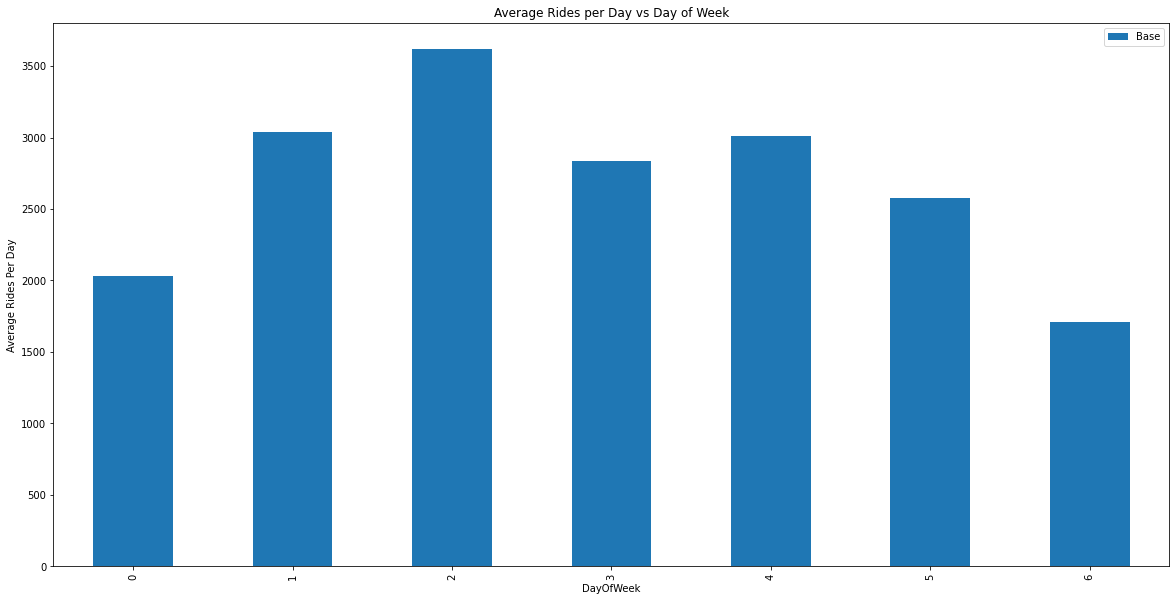

In [72]:
weekdayAverage.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.title('Average Rides per Day vs Day of Week')

Text(0.5, 1.0, 'Number of Rides vs Hour of Day')

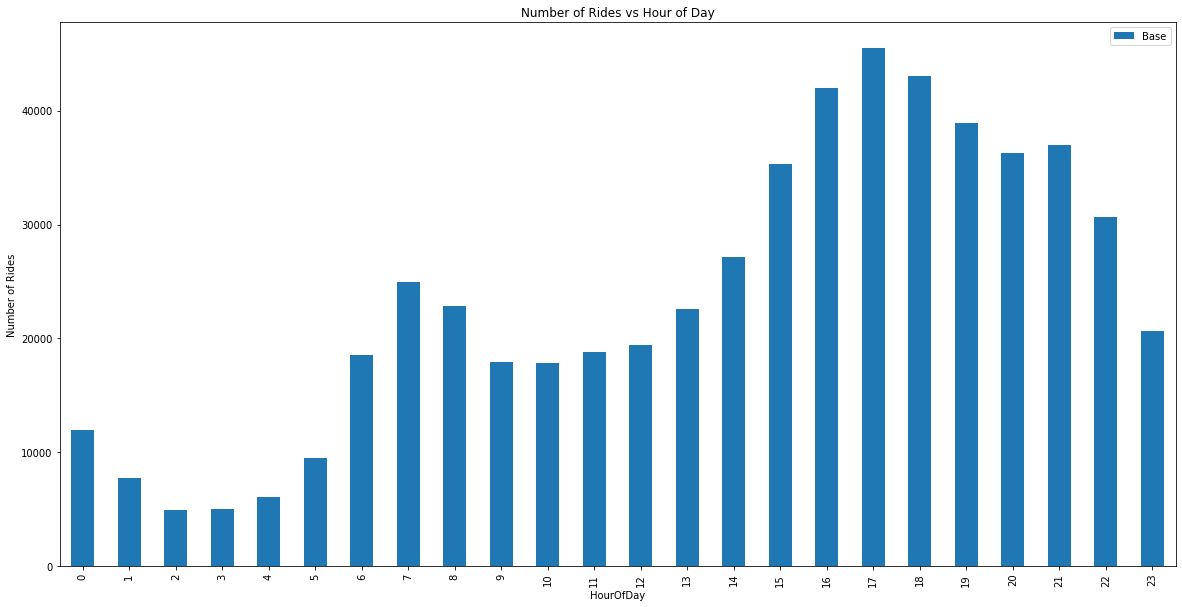

In [73]:
Hours = apr.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
Hours/30
Hours.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')

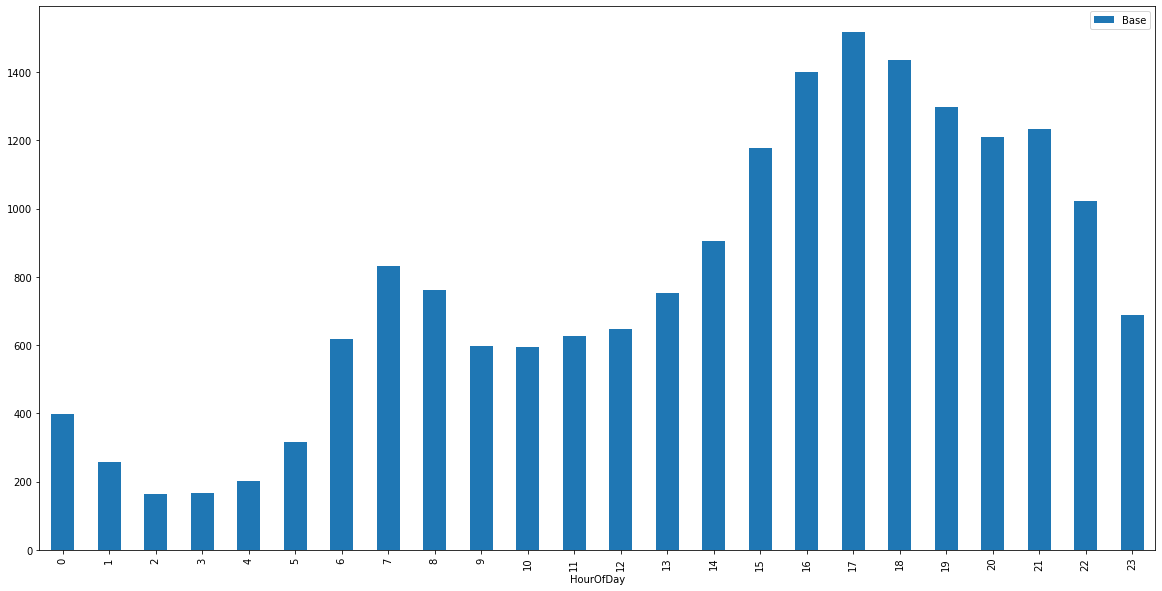

In [74]:
avgHours=Hours/30
avgHours.plot(kind='bar')

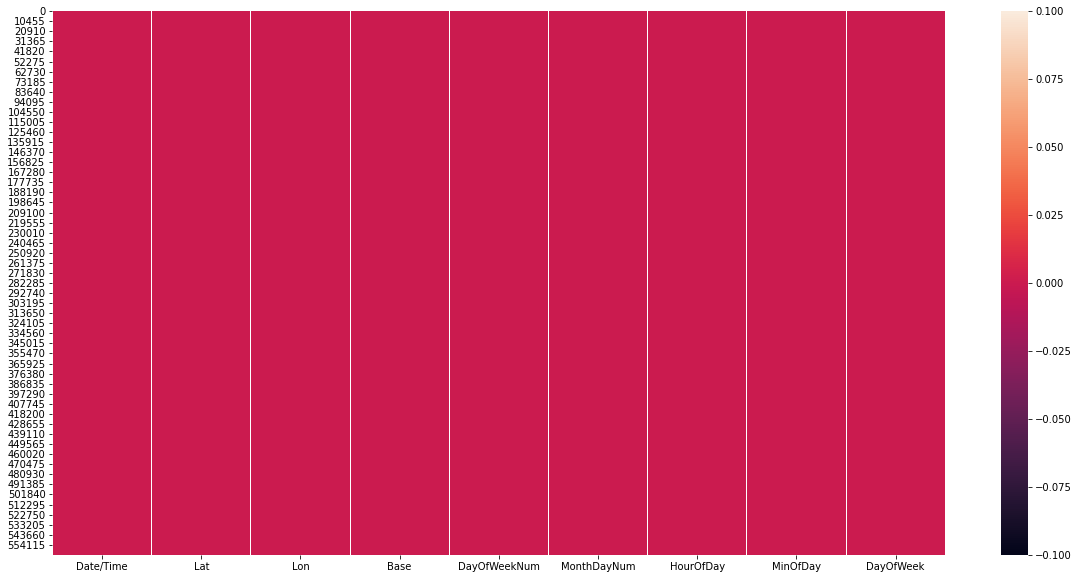

In [76]:
sns.heatmap(apr.isnull())

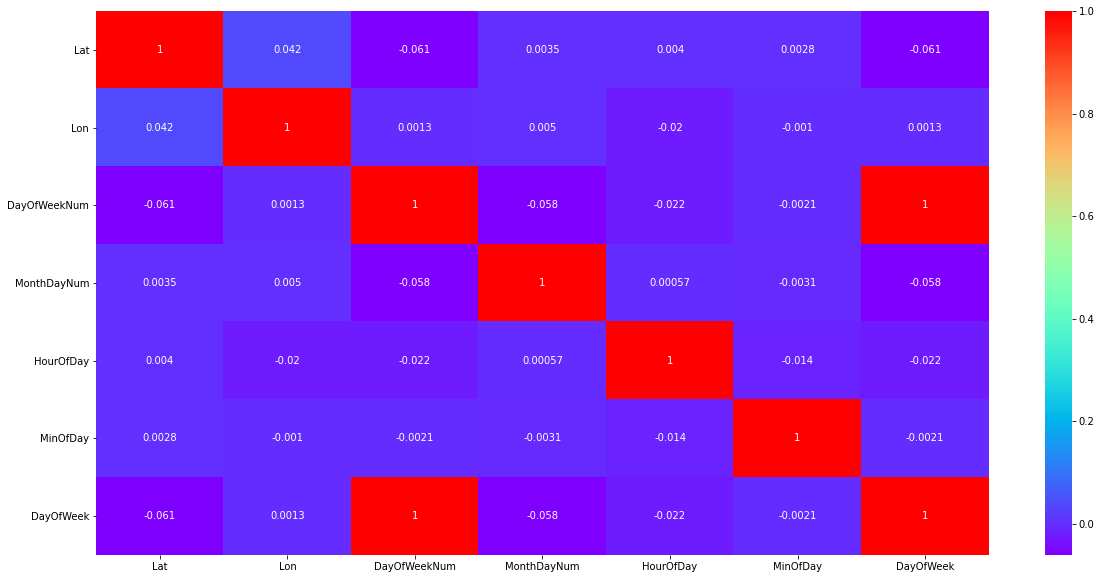

In [77]:
sns.heatmap(apr.corr(),cmap="rainbow",annot=True)

In [79]:
print(Hours)

            Base
HourOfDay       
0          11910
1           7769
2           4935
3           5040
4           6095
5           9476
6          18498
7          24924
8          22843
9          17939
10         17865
11         18774
12         19425
13         22603
14         27190
15         35324
16         42003
17         45475
18         43003
19         38923
20         36244
21         36964
22         30645
23         20649
